# SKY2TRAVEL CHATBOT WITH NLTK

ETL SQUAD: <br>
Jessica López <br>
Alberto Padilla <br>
Ruben Tenreiro <br>
Marco Hernani <br>

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk.regexp import *
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTagger
import pandas as pd
import unidecode

# For microphone use
import speech_recognition as sr

# For chatbot
from nltk.chat.util import Chat, reflections

# For program talking to the user
import pyttsx3

In [2]:
aerolineas = [ "American Airlines", "Delta Air Lines", "United Airlines", "Southwest Airlines", "Alaska Airlines", "JetBlue Airways", "Spirit Airlines", "Frontier Airlines", "Hawaiian Airlines", "Allegiant Air", "Sun Country Airlines", "Virgin America", "Mesa Airlines", "Republic Airways", "SkyWest Airlines" ]
aerolineas = list(map(lambda x: x.lower(), aerolineas))


In [3]:
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

In [4]:
ciudades = pd.read_csv("cities.csv", names = ["ciudad"])
ciudades = list(ciudades['ciudad'].str.lower())
ciudades

['new york',
 'los angeles',
 'chicago',
 'dallas',
 'philadelphia',
 'houston',
 'toronto',
 'washington',
 'miami',
 'atlanta',
 'boston',
 'san francisco',
 'detroit',
 'riverside',
 'phoenix',
 'montreal',
 'seattle',
 'minneapolis–st. paul–bloomington',
 'san diego',
 'st. louis',
 'tampa',
 'baltimore',
 'denver',
 'vancouver',
 'pittsburgh',
 'portland',
 'sacramento–arden',
 'san antonio',
 'orlando',
 'cincinnati',
 'cleveland',
 'kansas city',
 'las vegas',
 'san jose',
 'columbus',
 'charlotte',
 'indianapolis',
 'austin',
 'virginia beach',
 'providence',
 'nashville',
 'milwaukee',
 'jacksonville',
 'memphis',
 'louisville/jefferson county',
 'richmond',
 'oklahoma city',
 'ottawa',
 'calgary',
 'hartford',
 'new orleans',
 'edmonton',
 'buffalo',
 'raleigh',
 'birmingham',
 'salt lake city',
 'rochester',
 'tucson',
 'honolulu',
 'tulsa',
 'fresno',
 'bridgeport',
 'albuquerque',
 'albany',
 'omaha',
 'new haven',
 'dayton',
 'bakersfield',
 'oxnard',
 'allentown',
 'bato

['new york',
 'los angeles',
 'chicago',
 'dallas',
 'philadelphia',
 'houston',
 'toronto',
 'washington',
 'miami',
 'atlanta',
 'boston',
 'san francisco',
 'detroit',
 'riverside',
 'phoenix',
 'montreal',
 'seattle',
 'minneapolis–st. paul–bloomington',
 'san diego',
 'st. louis',
 'tampa',
 'baltimore',
 'denver',
 'vancouver',
 'pittsburgh',
 'portland',
 'sacramento–arden',
 'san antonio',
 'orlando',
 'cincinnati',
 'cleveland',
 'kansas city',
 'las vegas',
 'san jose',
 'columbus',
 'charlotte',
 'indianapolis',
 'austin',
 'virginia beach',
 'providence',
 'nashville',
 'milwaukee',
 'jacksonville',
 'memphis',
 'louisville/jefferson county',
 'richmond',
 'oklahoma city',
 'ottawa',
 'calgary',
 'hartford',
 'new orleans',
 'edmonton',
 'buffalo',
 'raleigh',
 'birmingham',
 'salt lake city',
 'rochester',
 'tucson',
 'honolulu',
 'tulsa',
 'fresno',
 'bridgeport',
 'albuquerque',
 'albany',
 'omaha',
 'new haven',
 'dayton',
 'bakersfield',
 'oxnard',
 'allentown',
 'bato

In [5]:
def detector_word(_frase, _special_words):
    """Returns the word
    _special_words: a list with all the proper nouns
    _frase: """
    special_words = []
    for word in _special_words:
        if(word.lower() in _frase.lower()):
            special_words.append(word.lower())
    return special_words

In [6]:
def tokenizar(_frase):
    """Tokenizes a sentence
    _frase: sentence to tokenize
    returns: a list with the words of sentence"""
    _frase = unidecode.unidecode(_frase)
    ciudades_en_frase = detector_word(_frase, ciudades)
    airlines_en_frase = detector_word(_frase, aerolineas)
    meses_en_frase = detector_word(_frase, meses)
    sentence_slicer = [*ciudades_en_frase[:2],*airlines_en_frase, *meses_en_frase]
    
    special_words_indexes = []

    for word in sentence_slicer:
        for i in range(len(_frase)-len(word)+1):
            if(word.lower() == _frase[i:i+len(word)].lower()):
                special_words_indexes.append((i, word))

    #Sorts the list of tuples
    special_words_indexes.sort(key=lambda x: x[0])

    little_bits = []
    i= 0
    for x in special_words_indexes:
        #Get substring from i to beggining of special words
        part_tokens = word_tokenize(_frase[i:x[0]], "spanish")
        part_tokens = [word.lower() for word in part_tokens if word.isalnum()]
        little_bits.extend([*part_tokens, x[1]])
        i = x[0] + len(x[1])

    #In case there is a part left to be tokenized after the last special words
    if(i < len(_frase)-1):
        part_tokens = word_tokenize(_frase[i:], "spanish")
        part_tokens = [word.lower() for word in part_tokens if word.isalnum()]
        little_bits.extend([*part_tokens])

    return little_bits


In [7]:
def parsear(tokens):
    return parser.parse(tokens)

In [8]:
def get_json(_sentence):
    tree_sentence_tag = parsear(hmm.tag(tokenizar(_sentence)))
    semi_query = []
    for x in tree_sentence_tag[:]:
        if (type(x) == Tree):
            semi_query.append((x.label(),x[:]))

    json_query = {'numeroBilletes': '', 'Origen': '', 'Destino': '', 'fecha': [], 'aerolinea': ''}

    for x in semi_query:
        if(x[0] == 'fecha'):
            fecha_vuelo = list(map(lambda t: t[0], x[1]))
            json_query['fecha'] = " ".join(fecha_vuelo)
        else:
            json_query[x[0]] = x[1][0][0]

    return(json_query)

In [9]:
def get_voice():
    # Crear instancia del objeto reconocedor
    r = sr.Recognizer()
    # Utilizar el micrófono del sistema como fuente de audio
    with sr.Microphone() as source:
        # Ajustar nivel de ruido ambiental
        r.adjust_for_ambient_noise(source)
        print("Di algo...")
        # Escuchar audio del usuario
        audio = r.listen(source)
        
        # Convertir audio a texto utilizando el reconocimiento de voz de Google
        frase_user = r.recognize_google(audio, language='es-ES')
        
        frase_user = unidecode.unidecode(frase_user)
        
        return frase_user

In [10]:
def talk_to_user(s, engine):
    engine.say(s)
    engine.runAndWait()

In [11]:
def query_correction(_query, engine):
    
    while(_query["aerolinea"] not in aerolineas):
        talk_to_user('Por favor, introduce el nombre de la aerolinea: ', engine)
        _query["aerolinea"] = get_voice().lower()

    while(_query["Destino"] not in ciudades):
        talk_to_user('Por favor, introduce la ciudad de destino: ', engine)
        _query["Destino"] = get_voice().lower()

    while(_query["Origen"] not in ciudades):
        talk_to_user('Por favor, introduce la ciudad de origen: ', engine)
        _query["Origen"] = get_voice().lower()

    while(len(_query["fecha"]) == 0):
        talk_to_user('Por favor, introduce la fecha: ', engine)
        _query["fecha"] = get_voice().lower()    
    else:
        print('Gracias, procesando tu peticion...')

In [12]:
def ultron_chat(engine):

    quit_words = ['n', 'no']
    q = ''

    talk_to_user("Hola, bienvenido a sky2travel, como te puedo ayudar?", engine)

    while(q not in quit_words):
        user_sentence = get_voice()
        json_sentence = get_json(user_sentence)

        #frasep="Quiero 3 vuelos de Cadiz a Madrid para el 5 de octubre con SAS"
        #json_sentence = get_json(frasep)

        query_correction(json_sentence, engine)
        
        print("Tu petición es:")
        print(json_sentence)
        print(f"""Perfecto. Voy a realizar la búsqueda de {json_sentence["numeroBilletes"]} billetes para tu viaje desde 
        {json_sentence["Origen"]} a {json_sentence["Destino"]} para el {json_sentence["fecha"]}
        con {json_sentence["aerolinea"]}.""")

        q = input("Quieres continuar s/n : \n")

In [13]:
train_corpus = [
 [('quisiera', "vmip000"),
  ('reservar', "vmn0000"),
  ('3', 'Z'),
  ('billetes', "ncmp000"),
  ('de', "sps00"),
  ('new york', "np00000"),
  ('a', "sps00"),
  ('los angeles',  "np00000"),
  ('el', "da0ms0"),
  ('13','Z'),              
  ('de', "sps00"),
  ('mayo','mes'),
  ('con', 'sps00'),
  ('ryanair', 'np00000')
  ],
    
  [("me", "pp000000"),
  ("gustaría", "vmic000"),
  ("reservar", "vmn0000"),
  ("2", "Z"),
  ("billetes", "ncmp000"),
  ("de", "sps00"),
  ("chicago", "np00000"),
  ("a", "sps00"),
  ("miami", "np00000"),
  ("para", "sps00"),
  ("el", "da0ms0"),
  ("próximo", "tiempo"),
  ("fin", "ncms000"),
  ("de", "sps00"),
  ("semana", "tiempo"),
  ("con", "sps00"),
  ("allegian air", "np00000")],
                
  [("tienen", "vmip3p0"),
  ("vuelos", "ncmp000"),
  ("de", "sps00"),
  ("san francisco", "np00000"),
  ("a", "sps00"),
  ("seattle", "np00000"),
  ("para", "sps00"),
  ("el", "da0ms0"),
  ('20','Z'),
  ("de", "sps00"),
  ("abril", "mes"), 
  ('con', 'sps00'),
  ('Iberia', 'np00000')],

  [("quiero", "vmip1s0"), 
  ("reservar", "vmn0000"), 
  ("3", "Z"), 
  ("billetes", "ncmp000"), 
  ("de", "sps00"), 
  ("dallas", "np00000"),
  ("a", "sps00"), 
  ("las vegas", "np00000"), 
  ("para", "sps00"), 
  ("el", "da0ms0"), 
  ("4", "Z"), 
  ("de", "sps00"),
  ("abril", "mes"),
  ("con", "sps00"), 
  ("spirit airlines", "np00000")],
                
  [("necesito", "vmip1s0"),
  ("2", "Z"), 
  ("billetes", "ncmp000"),  
  ("de", "sps00"), 
  ("boston", "np00000"), 
  ("a", "sps00"), 
  ("denver", "np00000"), 
  ("el", "da0ms0"), 
  ("6", "Z"), 
  ("de", "sps00"), 
  ("junio", "mes"),
  ("con", "sps00"), 
  ("allegiant air", "np00000")],

[("podría", "vmip3s0"), 
 ("reservar", "vmn0000"), 
 ("1", "Z"), 
 ("billete", "ncms000"),   
 ("de", "sps00"), 
 ("american airlines", "np00000"), 
 ("de", "sps00"), 
 ("washington d.c.", "np00000"), 
 ("a", "sps00"), 
 ("new orleans", "np00000"), 
 ("para", "sps00"), 
 ("el", "da0ms0"), 
 ("30", "Z"), 
 ("de", "sps00"), 
 ("febrero", "mes"),  
 ('con', 'sps00'),
 ('easyjet', 'np00000')],

[("me", "pp1cs000"), 
 ("gustaría", "vmis1s0"), 
 ("1", "Z"), 
 ("billete", "ncms000"), 
 ("de", "sps00"), 
 ("atlanta", "np00000"), 
 ("a", "sps00"), 
 ("orlando", "np00000"), 
 ("el", "da0ms0"), 
 ("15", "Z"), 
 ("de", "sps00"), 
 ("mayo", "mes"), 
 ("con", "sps00"), 
 ("hawaiian airlines", "np00000")],

[("tienen", "vmip3p0"),
 ("4", "Z"),
 ("vuelos", "ncmp000"), 
 ("de", "sps00"), 
 ("houston", "np00000"), 
 ("a", "sps00"), 
 ("phoenix", "np00000"), 
 ("para", "sps00"),
 ("el", "da0ms0"),
 ("7", "Z"),
 ("de", "sps00"),
 ("mayo", "mes"),
 ("con", "sps00"), 
 ("virgin america", "np00000")],

[("tienen", "vmip3p0"), 
 ('25', 'Z'),
 ("vuelos", "ncmp000"),
 ("de", "sps00"), 
 ("houston", "np00000"), 
 ("a", "sps00"), 
 ("phoenix", "np00000"), 
 ("para", "sps00"),
 ("el", "da0ms0"),
 ("7", "Z"),
 ("de", "sps00"),
 ("mayo", "mes"),
 ("con", "sps00"), 
 ("virgin america", "np00000")],

[('quiero', 'vmip3p0'),
  ('reservar', 'vmic000'),
  ('un', 'sps00'),
  ('vuelo', 'ncms000'),
  ('desde', 'sps00'),
  ('madrid', 'np00000'),
  ('a', 'sps00'),
  ('new york', 'np00000'),
  ('york', 'np00000'),
  ('para', 'sps00'),
  ("el", "da0ms0"),
  ("8", "Z"),
  ("de", "sps00"),
  ("diciembre", "mes"),
  ('con', 'sps00'),
  ('air europa', 'np00000')],
    
 [('necesito', 'pp000000'),
  ('comprar', 'vmic000'),
  ('1', 'Z'),
  ('billete', 'ncms000'),
  ('de', 'sps00'),
  ('valencia', 'np00000'),
  ('a', 'sps00'),
  ('paris', 'np00000'),
  ('para', 'sps00'),
  ("el", "da0ms0"),
  ("14", "Z"),
  ("de", "sps00"),
  ("mayo", "mes"),
  ('con', 'sps00'),
  ('SAS', 'np00000')],
    
 [('quiero', 'vmis1s0'),
  ('comprar', 'vmic000'),
  ('1', 'Z'),
  ('billete', 'ncms000'),
  ('de', 'sps00'),
  ('valencia', 'np00000'),
  ('a', 'sps00'),
  ('madrid', 'np00000'),
  ('para', 'sps00'),
  ('el', 'da0ms0'),
  ("28", "Z"),
  ("de", "sps00"),
  ("septiembre", "mes"),
  ('con', 'sps00'),
  ('Iberia', 'np00000')],
    
 [('quiero', 'vmis1s0'),
  ('2', 'Z'),
  ('vuelo', 'ncms000'),
  ('de', 'sps00'),
  ('barcelona', 'np00000'),
  ('a', 'sps00'),
  ('new york', 'np00000'),
  ('para', 'sps00'),
  ('el', 'da0ms0'),
  ("7", "Z"),
  ("de", "sps00"),
  ("abril", "mes"),
  ('con', 'sps00'),
  ('vueling', 'np00000')],
    
 [('necesito', 'vmip1s0'),
 ('2', 'Z'),
 ('billetes', 'ncmp000'),
 ('para', 'sps00'),
 ('ir', 'van0000'),
 ('desde', 'sps00'),
 ('madrid', 'np00000'),
 ('a', 'sps00'),
 ('tokio', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("17", "Z"),
 ("de", "sps00"),
 ("octubre", "mes"),
 ('con', 'sps00'),
 ('ryanair', 'np00000')],
              
[('dame', 'vmip1s0'),
 ('3', 'Z'),
 ('tickets', 'ncmp000'),
 ('desde', 'sps00'),
 ('madrid', 'np00000'),
 ('a', 'sps00'),
 ('barcelona', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("31", "Z"),
 ("de", "sps00"),
 ("febrero", "mes"),
 ('con', 'sps00'),
 ('easyjet', 'np00000')],

 [('necesito', 'vmn0000'),
 ('1', 'Z'),
 ('vuelo', 'ncms000'),
 ('de', 'spcms'),
 ('salt lake city', 'np00000'),
 ('a', 'sps00'),
 ('los angeles', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("1", "Z"),
 ("de", "sps00"),
 ("agosto", "mes"),
 ('con', 'sps00'),
 ('easyjet', 'np00000')],
                
[('necesito', 'vmn0000'),
 ('3', 'Z'),
 ('vuelos', 'ncmp000'),
 ('de', 'sps00'),
 ('minneapolis', 'np00000'),
 ('a', 'sps00'),
 ('dallas', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("13", "Z"),
 ("de", "sps00"),
 ("septiembre", "mes"),
 ('con', 'sps00'),
 ('emirates', 'np00000')],
                
 [('necesito', 'vmn0000'),
 ('un', 'di0ms0'),
 ('vuelo', 'ncms000'),
 ('de', 'spcms'),
 ('salt lake city', 'np00000'),
 ('a', 'sps00'),
 ('dallas', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("10", "Z"),
 ("de", "sps00"),
 ("marzo", "mes"),
 ('con', 'sps00'),
 ('lufthansa', 'np00000')],

[('quiero', 'vmic000'),
 ('3', 'Z'),
 ('billetes', 'ncms000'),
 ('de', 'sps00'),
 ('bogota', 'np00000'),
 ('a', 'sps00'),
 ('la paz', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("6", "Z"),
 ("de", "sps00"),
 ("noviembre", "mes"),
 ('con', 'sps00'),
 ('vueling', 'np00000')],
    
 [('necesito', 'vmn0000'),
 ('1', 'Z'),
 ('vuelo', 'ncms000'),
 ('de', 'spcms'),
 ('scranton', 'np00000'),
 ('a', 'sps00'),
 ('new york', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ("19", "Z"),
 ("de", "sps00"),
 ("julio", "mes"),
 ('con', 'sps00'),
 ('etl airlines', 'np00000')]]

In [14]:
hmm = HiddenMarkovModelTagger.train(train_corpus)

We check that there is 20 tagged sentences

In [15]:
len(train_corpus)

20

20

In [16]:
hmm.tag(tokenizar("Quiero 2 billetes de Barcelona a Madrid para el 15 de agosto con SAS"))

[('quiero', 'vmip1s0'),
 ('2', 'Z'),
 ('billetes', 'ncmp000'),
 ('de', 'sps00'),
 ('barcelona', 'np00000'),
 ('a', 'sps00'),
 ('madrid', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ('15', 'Z'),
 ('de', 'sps00'),
 ('agosto', 'mes'),
 ('con', 'sps00'),
 ('sas', 'np00000')]

[('quiero', 'vmip1s0'),
 ('2', 'Z'),
 ('billetes', 'ncmp000'),
 ('de', 'sps00'),
 ('barcelona', 'np00000'),
 ('a', 'sps00'),
 ('madrid', 'np00000'),
 ('para', 'sps00'),
 ('el', 'da0ms0'),
 ('15', 'Z'),
 ('de', 'sps00'),
 ('agosto', 'mes'),
 ('con', 'sps00'),
 ('sas', 'np00000')]

## Rules

In [17]:
reglas = r"""

Origen: <sp.*> {<np.*> <np.*> <np.*> | <.*> <np.*> | <np.*>} <sp.*>

Destino: <Origen> <sp.*> {<np.*> <np.*> <np.*> | <.*> <np.*> | <np.*>}

numeroBilletes: {<Z>} <nc.*>  

fecha: {<Z> <sp.*><mes>}

aerolinea: <fecha> <sp.*> {<np.*>}

"""

parser = nltk.RegexpParser(reglas)

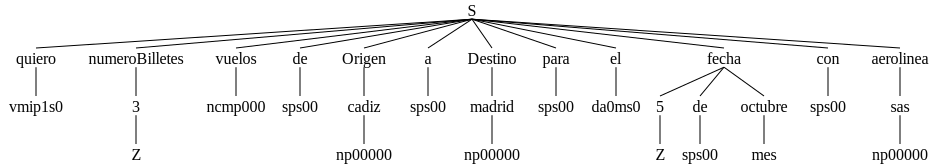

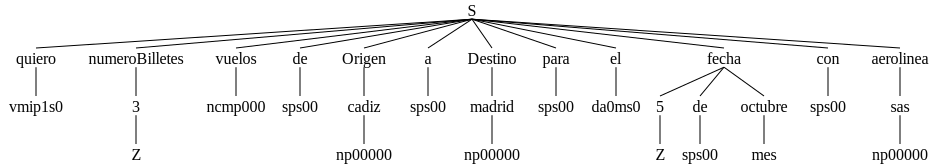

In [18]:
frasep="Quiero 3 vuelos de Cadiz a Madrid para el 5 de octubre con SAS"
tree_frasep = parsear(hmm.tag(tokenizar(frasep)))
tree_frasep

## Chatbot

In [19]:
engine = pyttsx3.init()
#Speed setting
engine.setProperty('rate', 140)

#Language settings
engine.setProperty('voice', 'spanish')

In [20]:
ultron_chat(engine)

Di algo...
Di algo...
result2:
{   'alternative': [   {   'confidence': 0.94906646,
                           'transcript': 'de New Jersey a New York para el '
                                         'tres de noviembre con American '
                                         'Airlines'},
                       {   'transcript': 'de Neo New Jersey a New York para el '
                                         'tres de noviembre con American '
                                         'Airlines'},
                       {   'transcript': 'de Neo New Jersey a New York para el '
                                         'tres de noviembre con American Air '
                                         'Lines'}],
    'final': True}
result2:
{   'alternative': [   {   'confidence': 0.94906646,
                           'transcript': 'de New Jersey a New York para el '
                                         'tres de noviembre con American '
                                         'Airlines'},
 